## Introduction

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Required to import, and briefly discuss, the libraries that will be used throughout analysis and modelling. |

---

In [6]:
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Load the data from the `train and test` file into a DataFrame. |

---

In [7]:
# loaded the data from the df file as a dataFrame
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv")

In [8]:
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| Perform an in-depth analysis of all the variables in the DataFrame. |

---


In [9]:
#displays the number of rows and columns 
df_train.shape
df_test.shape

(10546, 2)

In [10]:
''''
Displays info about the columns
'message' is categorical whereas
'tweetId' & 'sentiment' are numerical
'''
df_train.info()
print("\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


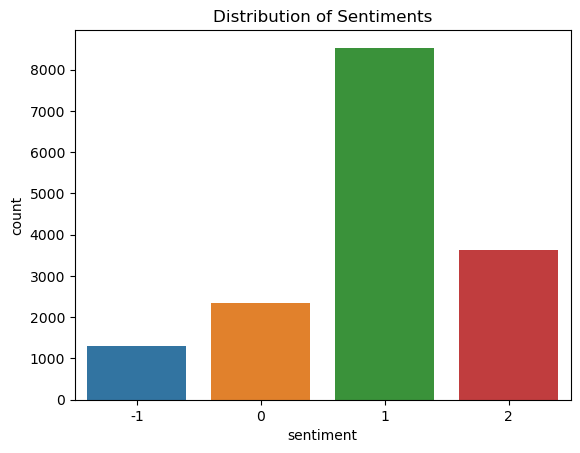

In [11]:
'''
The distribution of classes in 'sentiment'
1(reference class) has the highest distribution
'''

sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiments')
plt.show()

#### Tweet Data Analysis

1. Average length of tweets

In [12]:
# Analyze the characteristics of the tweet text
df_train['tweet_length'] = df_train['message'].apply(len)

2. Distribution of tweet length

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


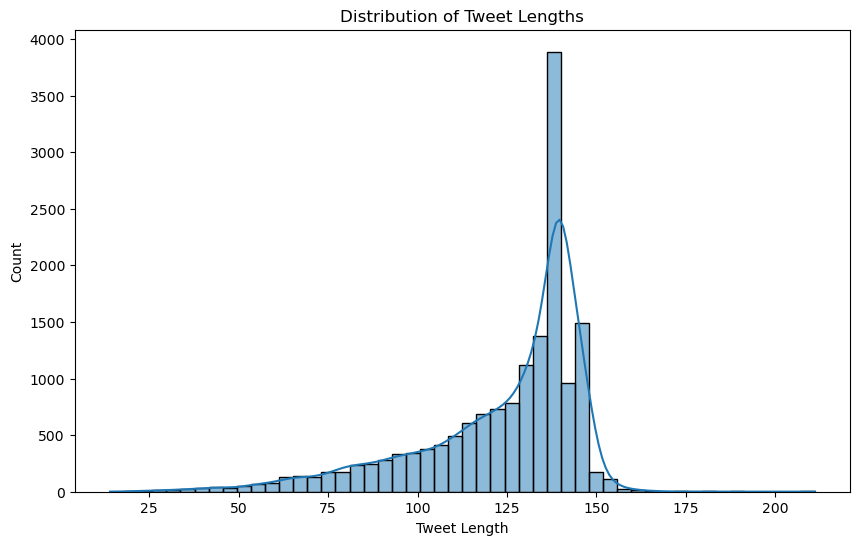

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

3. Common words and phrases

In [14]:
'''
Concatenates the all the tweets into a single string
and tokenises the text into individual words and
outputs the most common words & its frequencies
'''
all_text = ' '.join(df_train['message'].astype(str))

tokens = word_tokenize(all_text)
fdist = FreqDist(tokens)
common_words = fdist.most_common(10)
print("Common Words:", common_words)

bi_grams = list(bigrams(tokens))
bi_gram_freq = FreqDist(bi_grams)
common_bigrams = bi_gram_freq.most_common(10)
print("Common Bigrams:", common_bigrams)

Common Words: [(':', 22517), ('@', 14835), ('climate', 12607), ('change', 12332), ('https', 10001), ('RT', 9717), ('.', 7283), ('to', 7083), ('the', 6421), (',', 6152)]
Common Bigrams: [(('climate', 'change'), 12006), (('https', ':'), 10001), (('RT', '@'), 9616), (('global', 'warming'), 3287), (('change', '.'), 1391), (('change', 'https'), 1342), (('on', 'climate'), 1171), (('change', 'is'), 1166), (('.', 'https'), 1061), (('&', 'amp'), 940)]


4. WordCloud

Text(0.5, 1.0, 'WordCloud for Positive Sentiments')

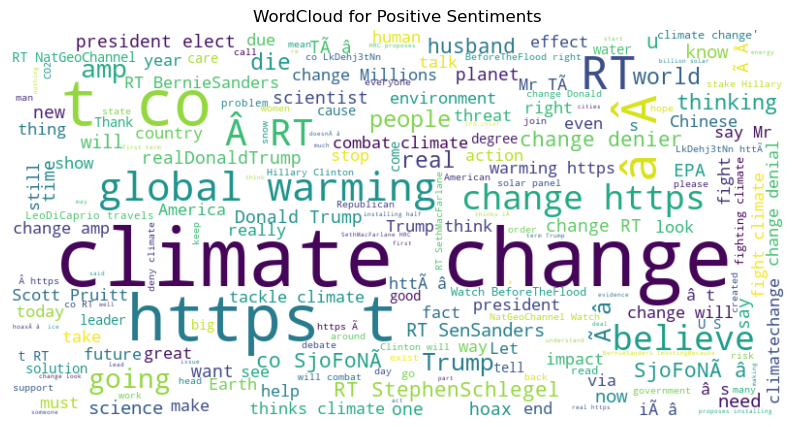

In [15]:
'''
WordCloud: data visualization technique used for representing text data
in which the size of each word indicates its frequency or importance.
widely used for analyzing data from social network websites. (Twitter)
1 is the reference class(people who are in support of climate change)
'''

positive_tweets = df_train[df_train['sentiment'] == 1]['message'].values
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Sentiments')

5. Verify for any null values

In [16]:
df_train.isnull().sum()
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| Clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| Create one or more classification models that are able to accurately predict |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| Compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---